In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('../input/adult-income-dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify = df['income'])

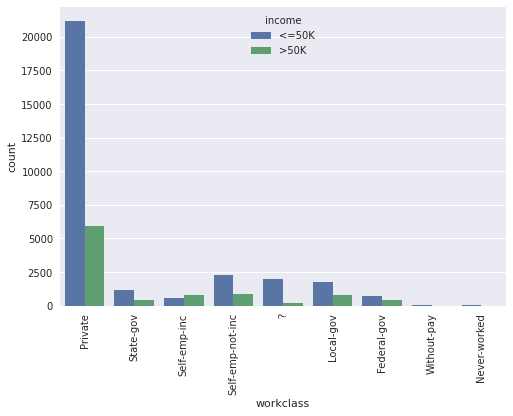

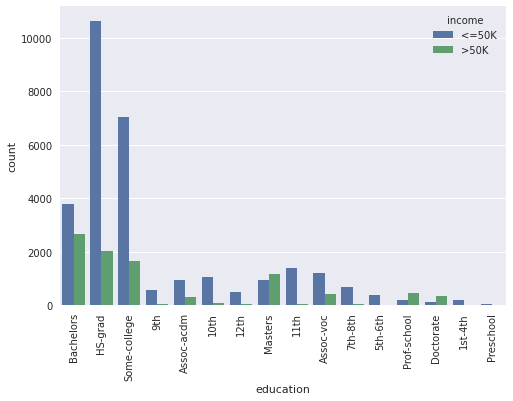

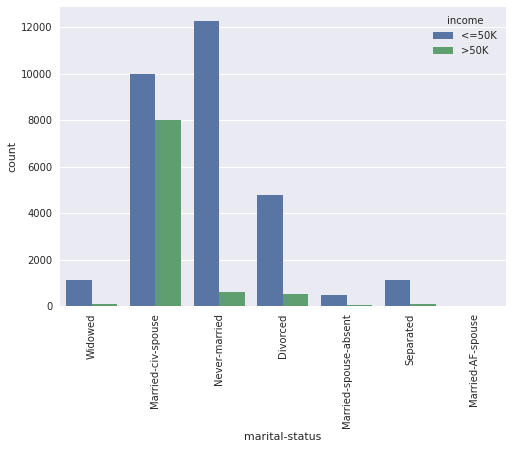

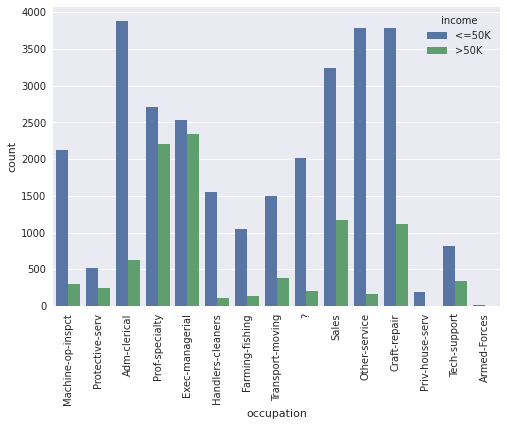

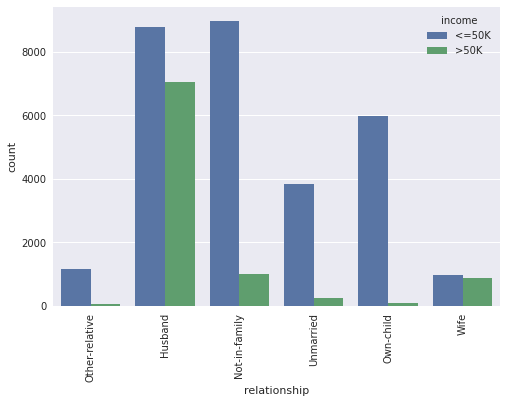

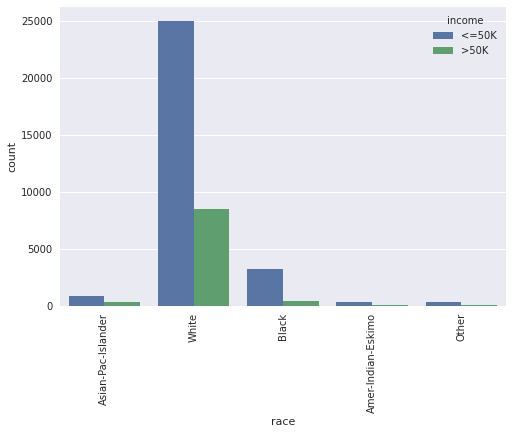

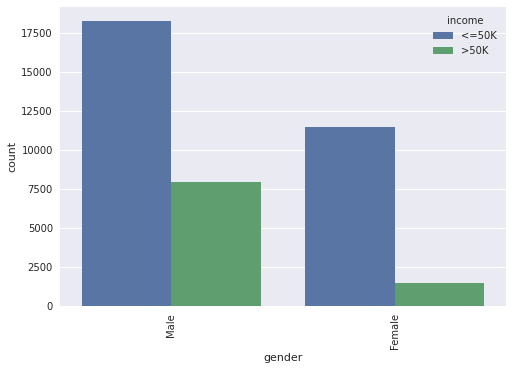

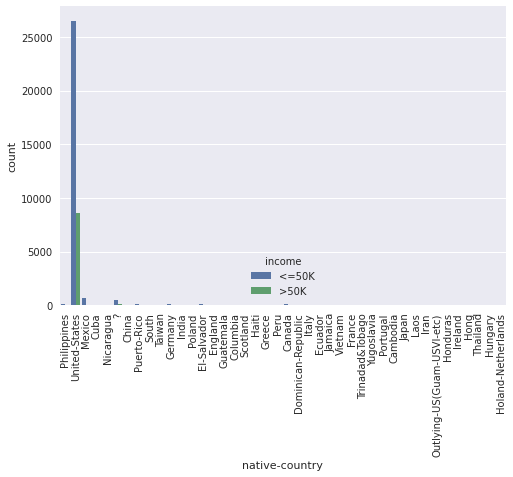

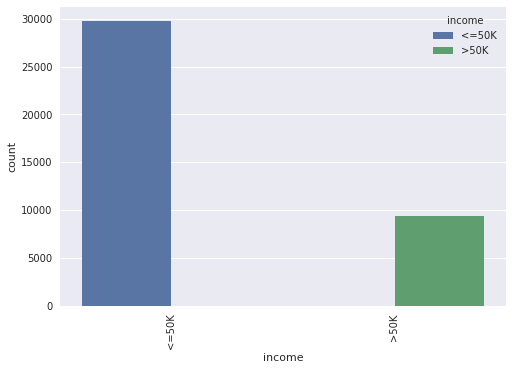

In [6]:
cat_features = [c for c in df_train.columns if df_train[c].dtype == 'object']
for c in cat_features:
    sns.countplot(df_train[c], hue=df_train['income'])
    plt.xticks(rotation=90)
    plt.show()

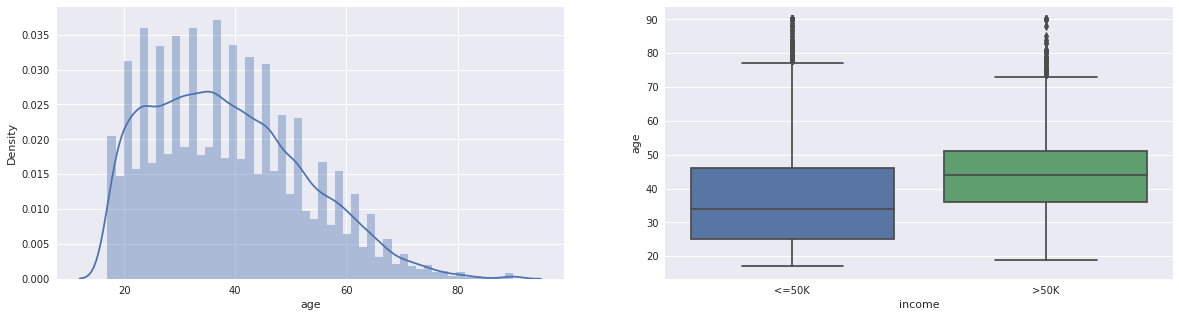

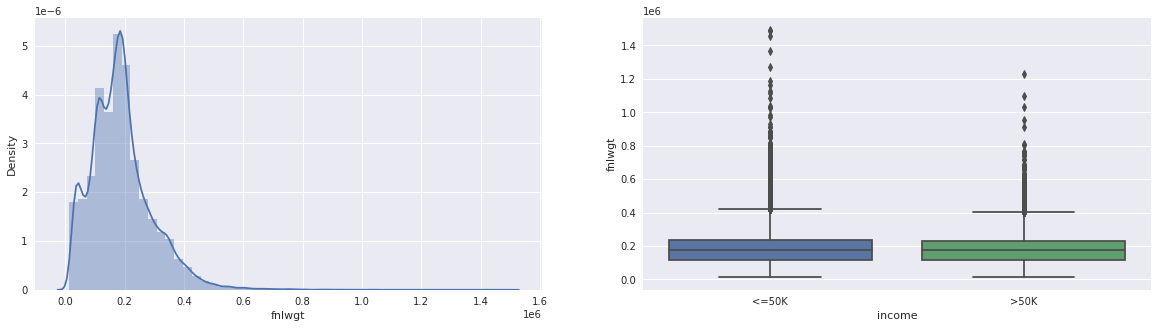

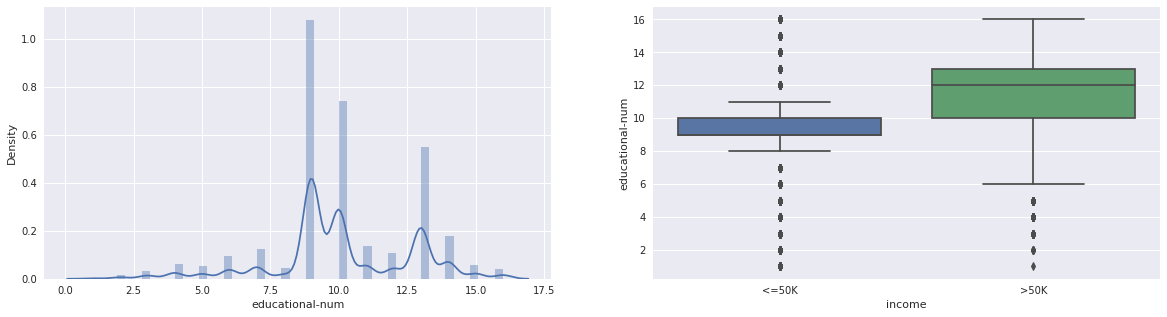

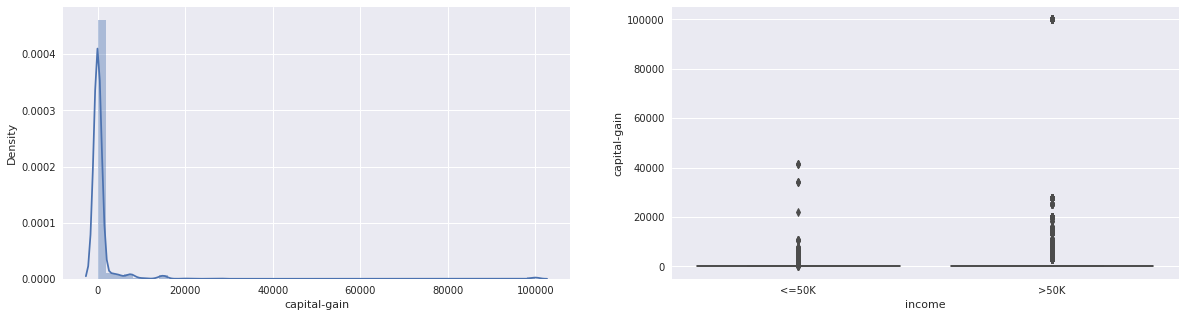

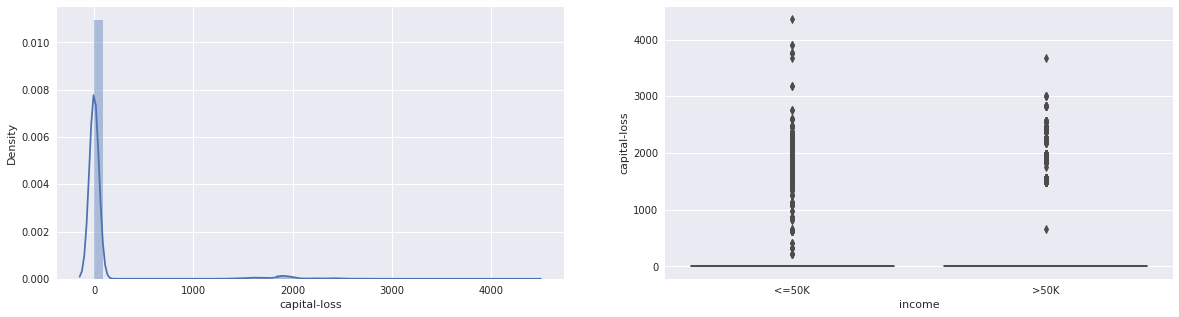

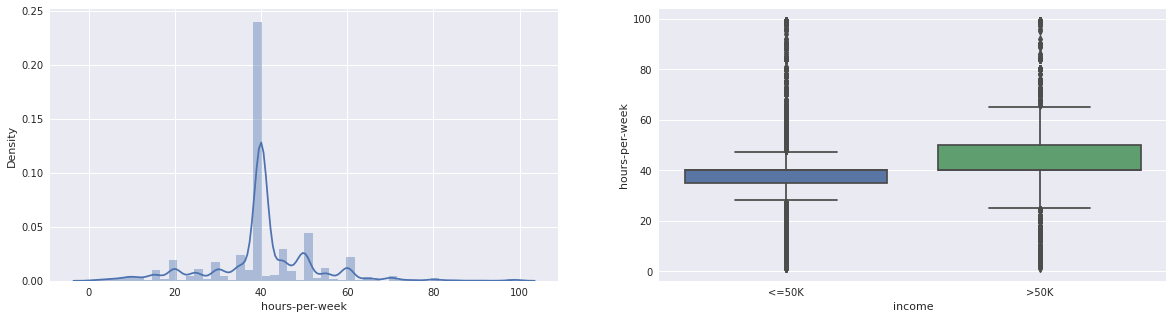

In [7]:
num_features = [c for c in df_train.columns if df_train[c].dtype != 'object']
for c in num_features:
    f, axis = plt.subplots(1,2, figsize=(20, 5))
    sns.distplot(df_train[c], ax=axis[0], kde=True)
    sns.boxplot(df_train['income'], df_train[c], ax=axis[1])
    plt.show()

In [8]:
X_train = df_train.drop(columns=['income'])
X_test = df_test.drop(columns=['income'])
y_train = pd.get_dummies(df_train['income'], drop_first=True)
y_test = pd.get_dummies(df_test['income'], drop_first=True)

In [9]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'native-country'], m=5.0)

encoder.fit(X_train, y_train)

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

X_train_encoded = pd.get_dummies(X_train_encoded,drop_first=True)
X_test_encoded = pd.get_dummies(X_test_encoded,drop_first=True)

In [10]:
print(X_train_encoded.columns.to_list())
print(X_test_encoded.columns.to_list())

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'gender_Male']
['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'gender_Male']


In [11]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X_train_encoded, y_train = oversample.fit_resample(X_train_encoded, y_train)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

In [13]:
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=0)
rf.fit(X_train_encoded, y_train)

print(classification_report(y_test, rf.predict(X_test_encoded)))
print('Train score : ', f1_score(y_train, rf.predict(X_train_encoded)))
print('test score : ', f1_score(y_test, rf.predict(X_test_encoded)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7431
           1       0.75      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

Train score :  0.9998395807710818
test score :  0.6840877274848344


In [14]:
gbc = GradientBoostingClassifier(n_estimators=300, max_depth=5,random_state=0)
gbc.fit(X_train_encoded, y_train)

print(classification_report(y_test, gbc.predict(X_test_encoded)))
print('Train score : ', f1_score(y_train, gbc.predict(X_train_encoded)))
print('test score : ', f1_score(y_test, gbc.predict(X_test_encoded)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.78      0.66      0.72      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769

Train score :  0.7706517346879871
test score :  0.7168591224018477


In [15]:
adbc = AdaBoostClassifier(n_estimators=500, random_state=0)
adbc.fit(X_train_encoded, y_train)

print(classification_report(y_test, gbc.predict(X_test_encoded)))
print('Train score : ', f1_score(y_train, adbc.predict(X_train_encoded)))
print('test score : ', f1_score(y_test, adbc.predict(X_test_encoded)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.78      0.66      0.72      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769

Train score :  0.7111215281846948
test score :  0.7080223880597015
